In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import datetime



In [ ]:
df = pd.read_csv('store_train_20250621_143714.csv', dtype={'StateHoliday': str})
df = df[(df['Open'] == 1) & (df['Sales'] > 0)]


In [7]:
store_df = df[df['Store'] == 1].copy()
store_df.sort_values('Date', inplace=True)
store_df['Sales'] = store_df['Sales'].astype(float)

sales = store_df['Sales'].values.reshape(-1, 1)


In [8]:
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(sales)


In [9]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_sales, window_size)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (751, 30, 1)
y shape: (751, 1)


In [10]:
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


In [11]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], 1), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=[es]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0695 - val_loss: 0.0145
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0223 - val_loss: 0.0147
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0200 - val_loss: 0.0149
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0206 - val_loss: 0.0145
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0180 - val_loss: 0.0158
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0188 - val_loss: 0.0145
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0217 - val_loss: 0.0152
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0184 - val_loss: 0.0143
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0177 - val_loss: 0.0143
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0193 - val_loss: 0.0142
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0180 - val_loss: 0.0140
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step


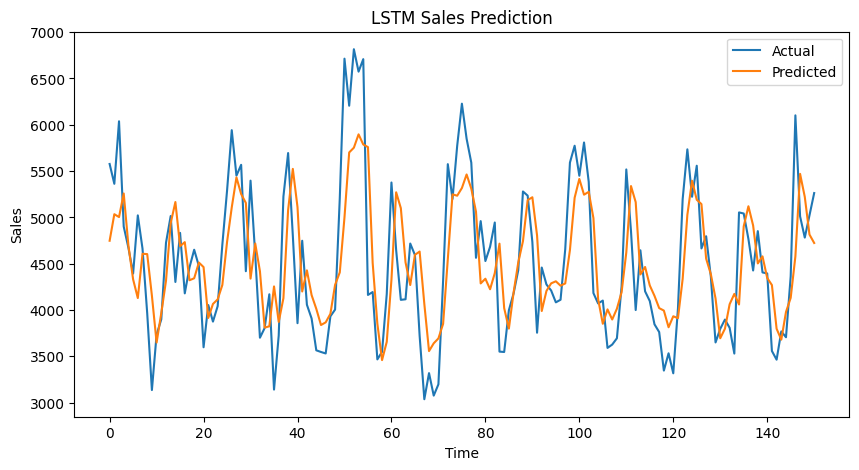

In [12]:
y_pred = model.predict(X_val)
y_val_inv = scaler.inverse_transform(y_val)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(10,5))
plt.plot(y_val_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [13]:
model_name = f'lstm_model_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.h5'
model.save(model_name)
print(f'Model saved as {model_name}')


Model saved as lstm_model_20250625_154404.h5


In [15]:
files.download('lstm_model_20250625_154404.h5')
files.download('4_time_series_lstm.ipynb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>